# 8. Neural networks and deep learning

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2025-11-27 10:49:34.185251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-27 10:49:34.185595: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-27 10:49:34.232005: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-27 10:49:35.611844: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
path = "./clothing-dataset-small/train/t-shirt/5ce4af56-0a90-49bb-b4bc-23ed04dc1b11.jpg"

The neural network expects images of a certain sizw

In [6]:
img = load_img(path, target_size=(299, 299))

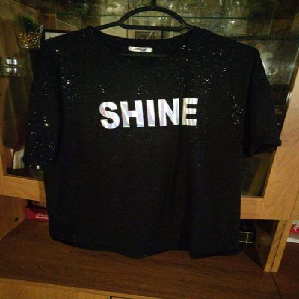

In [7]:
img

In [8]:
np.array(img)

array([[[ 75,  65,  30],
        [ 76,  63,  29],
        [ 75,  62,  28],
        ...,
        [ 19,  14,   8],
        [ 20,  15,   9],
        [ 26,  21,  15]],

       [[ 63,  53,  18],
        [ 68,  55,  21],
        [ 70,  57,  23],
        ...,
        [ 19,  14,   8],
        [ 20,  15,   9],
        [ 25,  20,  14]],

       [[ 68,  58,  23],
        [ 73,  60,  26],
        [ 76,  63,  29],
        ...,
        [ 19,  14,   8],
        [ 19,  14,   8],
        [ 24,  19,  13]],

       ...,

       [[112,  66,  17],
        [115,  71,  22],
        [111,  68,  17],
        ...,
        [ 47,  25,  12],
        [ 46,  24,  13],
        [ 45,  23,  12]],

       [[110,  64,  15],
        [111,  68,  17],
        [107,  66,  12],
        ...,
        [ 48,  24,  14],
        [ 47,  23,  13],
        [ 46,  21,  14]],

       [[109,  63,  14],
        [107,  64,  13],
        [103,  62,   8],
        ...,
        [ 47,  23,  13],
        [ 47,  23,  13],
        [ 46,  21,  14]]

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 Keras Applications

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2025-11-27 10:49:36.797391: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
X = np.array([x])

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


In [15]:
pred.shape

(1, 1000)

Each value in ```pred``` is the probability of the image to belong to one of the 1000 classes.

In [16]:
decode_predictions(pred)

[[('n04370456', 'sweatshirt', np.float32(0.4045117)),
  ('n03595614', 'jersey', np.float32(0.30967286)),
  ('n02916936', 'bulletproof_vest', np.float32(0.009767244)),
  ('n03379051', 'football_helmet', np.float32(0.0053174817)),
  ('n09835506', 'ballplayer', np.float32(0.0030424965))]]

The imagenet dataset does not contain tshirt as a class. So it is not particularly well-suited for clothes.

## 8.5 Transfer Learning

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

The names of the classes were inferred from the folder structure.

In [21]:
X, y = next(train_ds)

In [22]:
X.shape

(32, 150, 150, 3)

In [23]:
y.shape

(32, 10)

In [24]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [25]:
base_model = Xception(
    weights="imagenet",
    include_top=False,  # Exclude the dense layers
    input_shape=(150, 150, 3)
)

base_model.trainable = False  # We do not want to train the convolutional layers.

In [26]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [27]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [28]:
preds.shape

(32, 5, 5, 2048)

It's not a collection of vectors yet.

Pooling can be applied to turn the 5x5 squares into single values.

In [29]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [30]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [31]:
preds.shape

(32, 2048)

In [32]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [33]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [34]:
preds.shape

(32, 10)

For now the output is nonsense because we haven't trained the model yet.

We need an optimizer to find the best weights.

In [35]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # A way of evaluating multi-class classifications models.

In [36]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [37]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)  # epochs is the number of times the algorithm is trained over the whole dataset.

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6643 - loss: 1.2708 - val_accuracy: 0.7507 - val_loss: 1.1006
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8136 - loss: 0.6371 - val_accuracy: 0.7654 - val_loss: 0.9144
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8703 - loss: 0.3856 - val_accuracy: 0.7918 - val_loss: 0.8242
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9276 - loss: 0.2055 - val_accuracy: 0.7742 - val_loss: 0.8476
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9524 - loss: 0.1253 - val_accuracy: 0.8094 - val_loss: 0.8682
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9632 - loss: 0.1077 - val_accuracy: 0.8094 - val_loss: 0.9806
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9664 - loss: 0.0931 - val_accuracy: 0.8240 - val_loss: 0.8647
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9896 - loss: 0.0420 - val_accuracy: 0.8035 - v

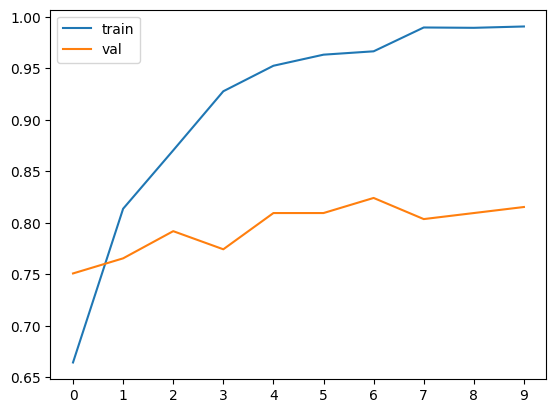

In [38]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

In [39]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

In [40]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print('\n\n')

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.3272 - loss: 1.9799 - val_accuracy: 0.4692 - val_loss: 1.6285
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.5577 - loss: 1.4074 - val_accuracy: 0.6217 - val_loss: 1.2642
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6431 - loss: 1.1486 - val_accuracy: 0.6979 - val_loss: 1.0708
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6845 - loss: 1.0033 - val_accuracy: 0.7331 - val_loss: 0.9613
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7122 - loss: 0.9066 - val_accuracy: 0.7654 - val_loss: 0.8836
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7304 - loss: 0.8382 - val_accuracy: 0.7478 - val_loss: 0.8356
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7461 - loss: 0.7851 - val_accuracy: 0.7683 - val_loss: 0.7894
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7624 - loss: 0.7415 - val_accuracy: 0.7

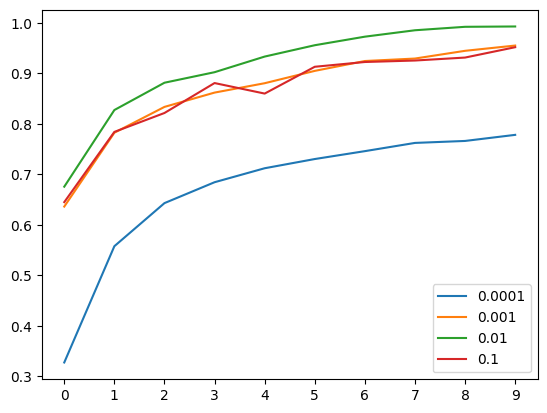

In [42]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

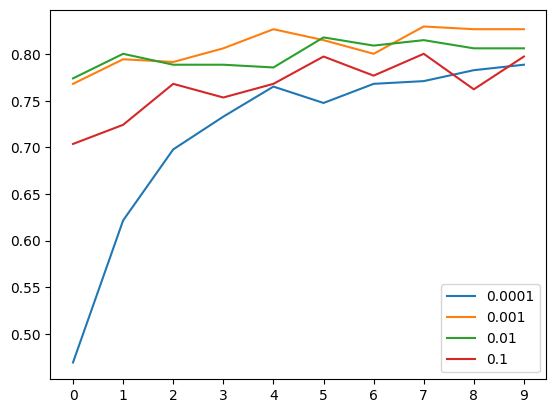

In [43]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
    
plt.xticks(np.arange(10))
plt.legend()

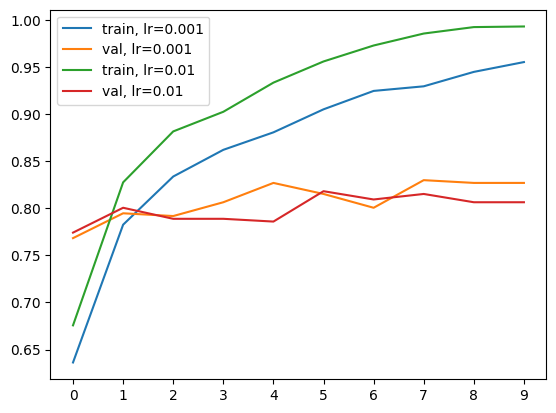

In [44]:
for lr, hist in scores.items():
    if lr in [0.01, 0.001]:
        plt.plot(hist["accuracy"], label=f"train, lr={lr}")
        plt.plot(hist["val_accuracy"], label=f"val, lr={lr}")
    
plt.xticks(np.arange(10))
plt.legend()

The best learning rate is 0.001

In [45]:
learning_rate = 0.001

## 8.7 Checkpointing

In [49]:
model.save_weights("model_v1.weights.h5")

In [50]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"  # We want to maximize the monitored metric, i.e. val_accuracy.
)

In [51]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5331 - loss: 1.4501

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6382 - loss: 1.0918 - val_accuracy: 0.7595 - val_loss: 0.7305
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8011 - loss: 0.6097

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7878 - loss: 0.6274 - val_accuracy: 0.7801 - val_loss: 0.6658
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8360 - loss: 0.5001

96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8302 - loss: 0.5009 - val_accuracy: 0.8182 - val_loss: 0.5970
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8680 - loss: 0.4292 - val_accuracy: 0.7947 - val_loss: 0.6019
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8895 - loss: 0.3903

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8905 - loss: 0.3722 - val_accuracy: 0.8211 - val_loss: 0.5714
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8985 - loss: 0.3411

96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9009 - loss: 0.3284 - val_accuracy: 0.8328 - val_loss: 0.5423
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9260 - loss: 0.2873 - val_accuracy: 0.8240 - val_loss: 0.5470
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9387 - loss: 0.2577 - val_accuracy: 0.8328 - val_loss: 0.5409
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9417 - loss: 0.2328 - val_accuracy: 0.8299 - val_loss: 0.5452
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9511 - loss: 0.2103 - val_accuracy: 0.8211 - val_loss: 0.5689


## 8.8 Adding more layers

In [26]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

At the end of neural networks, there is the activation step (softmax) which turns the raw scores of the last dense layer into probabilities.

Each dense layer needs an activation in order to achieve better performance. There are different types of activation functions. Sigmoid and softmax are used on the output of the final layer. ReLu (Rectified Linear Unit) is the function most commonly used on the output of inner layers.

In [ ]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print('\n\n')

10
Epoch 1/10
92/96 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3743 - loss: 1.7857

In [ ]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val, size={size}")
    
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
size = 100

## 8.9 Regularization and dropout

Dropout entails hiding part of the input (i.e. image) while training the model. This is actually applied to the inner layers. Part of the inner layer is frozen from one iteration to the next.

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.6):
    base_model = Xception(
        weights="imagenet",
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)  # The drop rate is the fraction of the network that is frozen
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"]
    )

    return model
    

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history
    
    print('\n\n')

Because we are freezing part of the network, more iterations (epochs) are needed to train the model.

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val, droprate={droprate}")

plt.legend()